In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

df = pd.read_csv('countries.csv')
df

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [4]:
df1 = df.copy().dropna()

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
df1.country = le.fit_transform(df1.country)
df1 = df1.drop("name", axis=1)
df1

,country,latitude,longitude
0,0,42.546245,1.601554
1,1,23.424076,53.847818
2,2,33.939110,67.709953
3,3,17.060816,-61.796428
4,4,18.220554,-63.068615
...,...,...,...
240,238,15.552727,48.516388
241,239,-12.827500,45.166244
242,240,-30.559482,22.937506
243,241,-13.133897,27.849332


In [6]:
df_arr = np.array(df1)
lat = df_arr[:,1]
lon = df_arr[:,2]

1. Dựa vào dữ liệu sau, hiển thị tọa độ của theo lat và lon của các nước lên một bản đồ

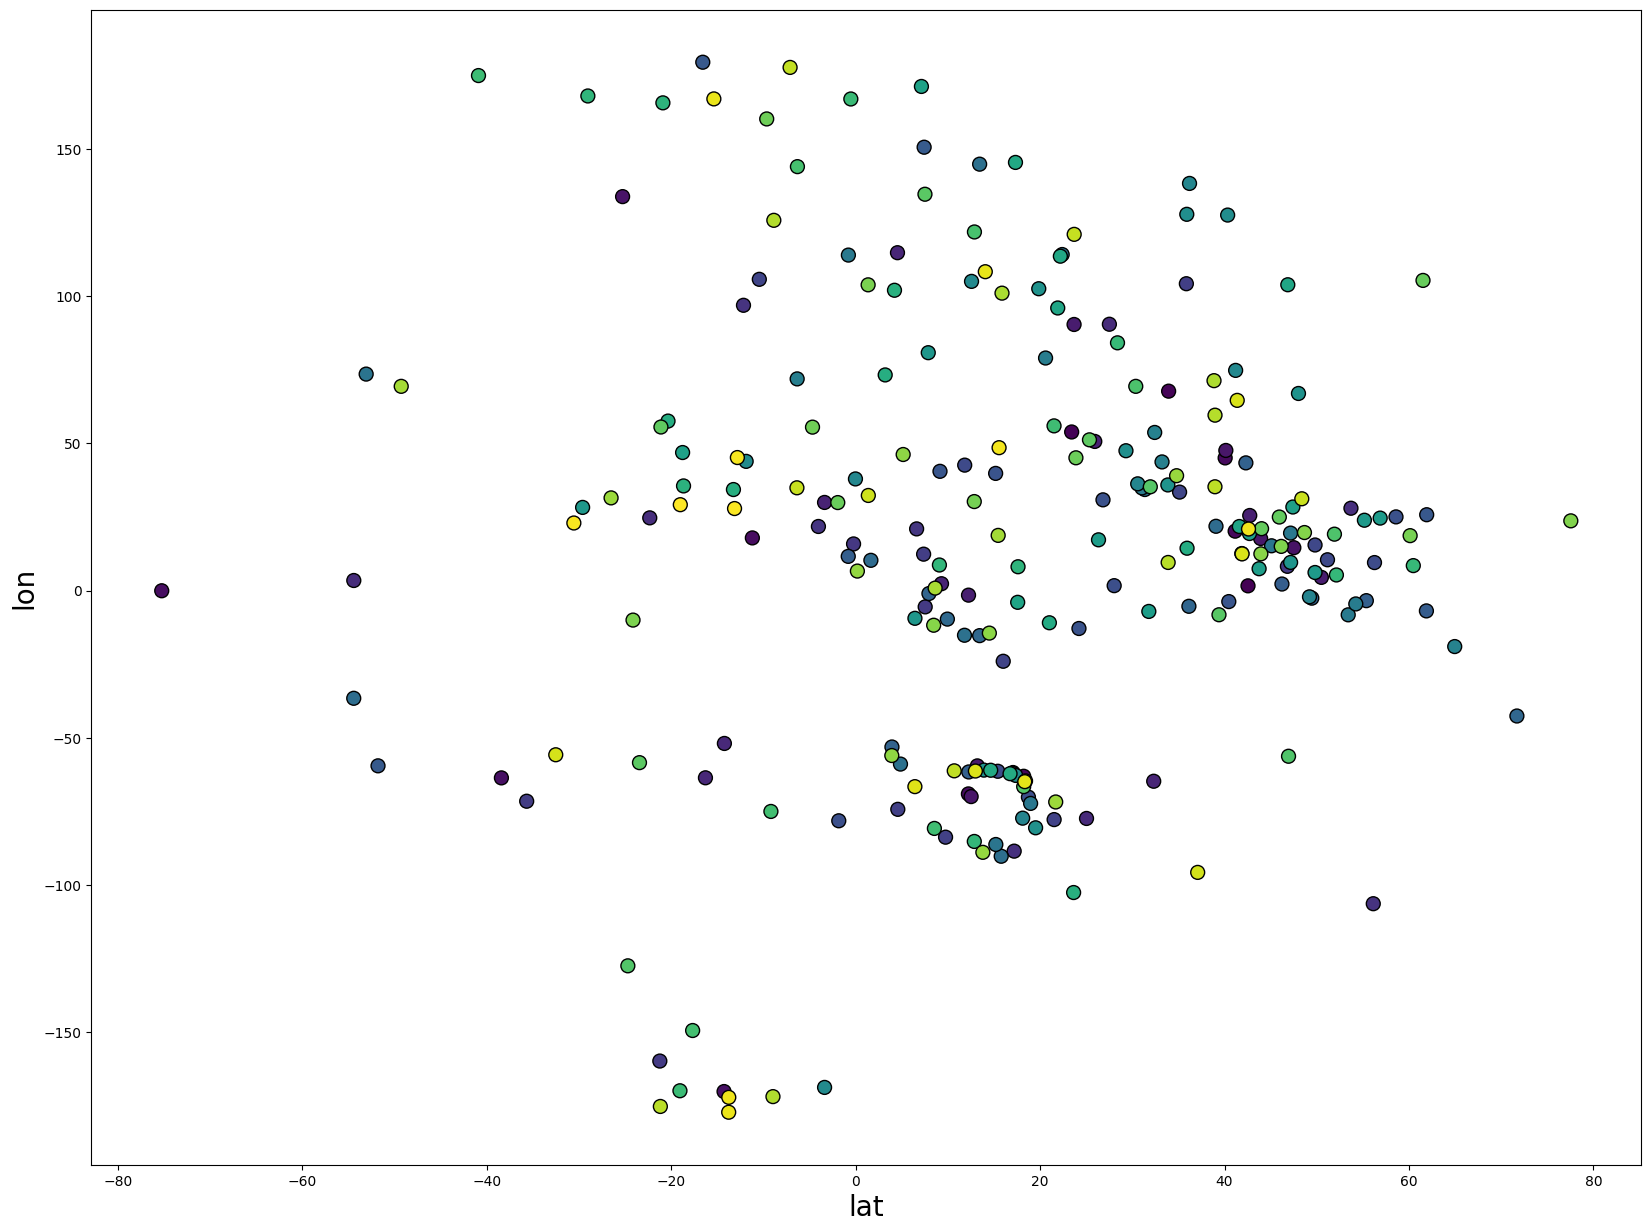

In [7]:
plt.figure(figsize=(20, 15))
plt.scatter(lat, lon, c = df1.iloc[:,0],marker = 'o', edgecolor='black', s = 100)

plt.xlabel('lat', fontsize = 20)
plt.ylabel('lon', fontsize = 20)
plt.show()

2. Phân cụm theo 3 thuật toán K-Means, DBSCAN, và DPC

KMEANS

In [8]:
country = df1.iloc[:,[1,2]]

In [9]:
file = "aggregation"

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
y_pred = kmeans.fit_predict(country)

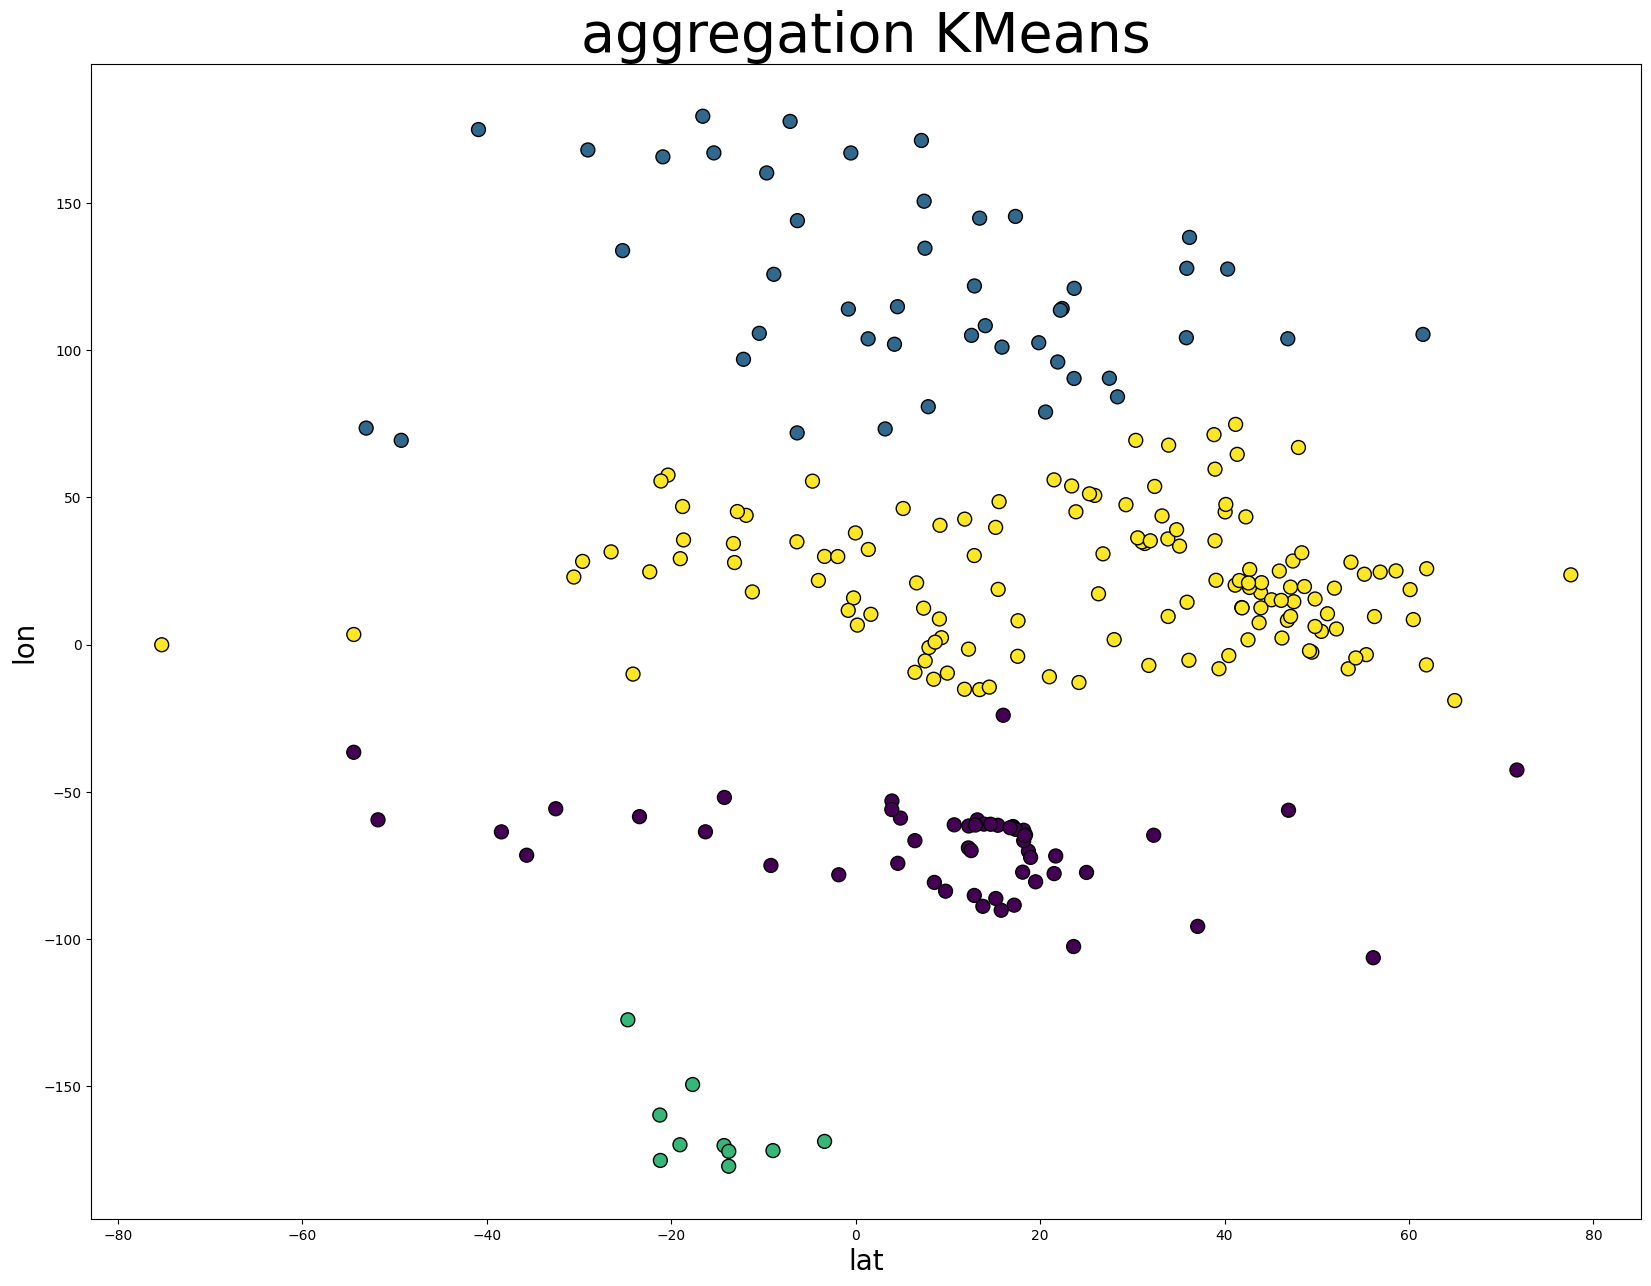

In [10]:
plt.figure(figsize=(20,15))
plt.scatter(
    lat, lon,
    c=y_pred, marker='o',
    edgecolor='black', s=100
)
plt.xlabel("lat", fontsize=20)
plt.ylabel("lon", fontsize=20)
plt.title(file + " KMeans", fontsize=40)
plt.savefig("./images/Kmeans.png")
plt.show()

In [11]:
df2 = df1.drop("country", axis=1)

0.5370203878899612


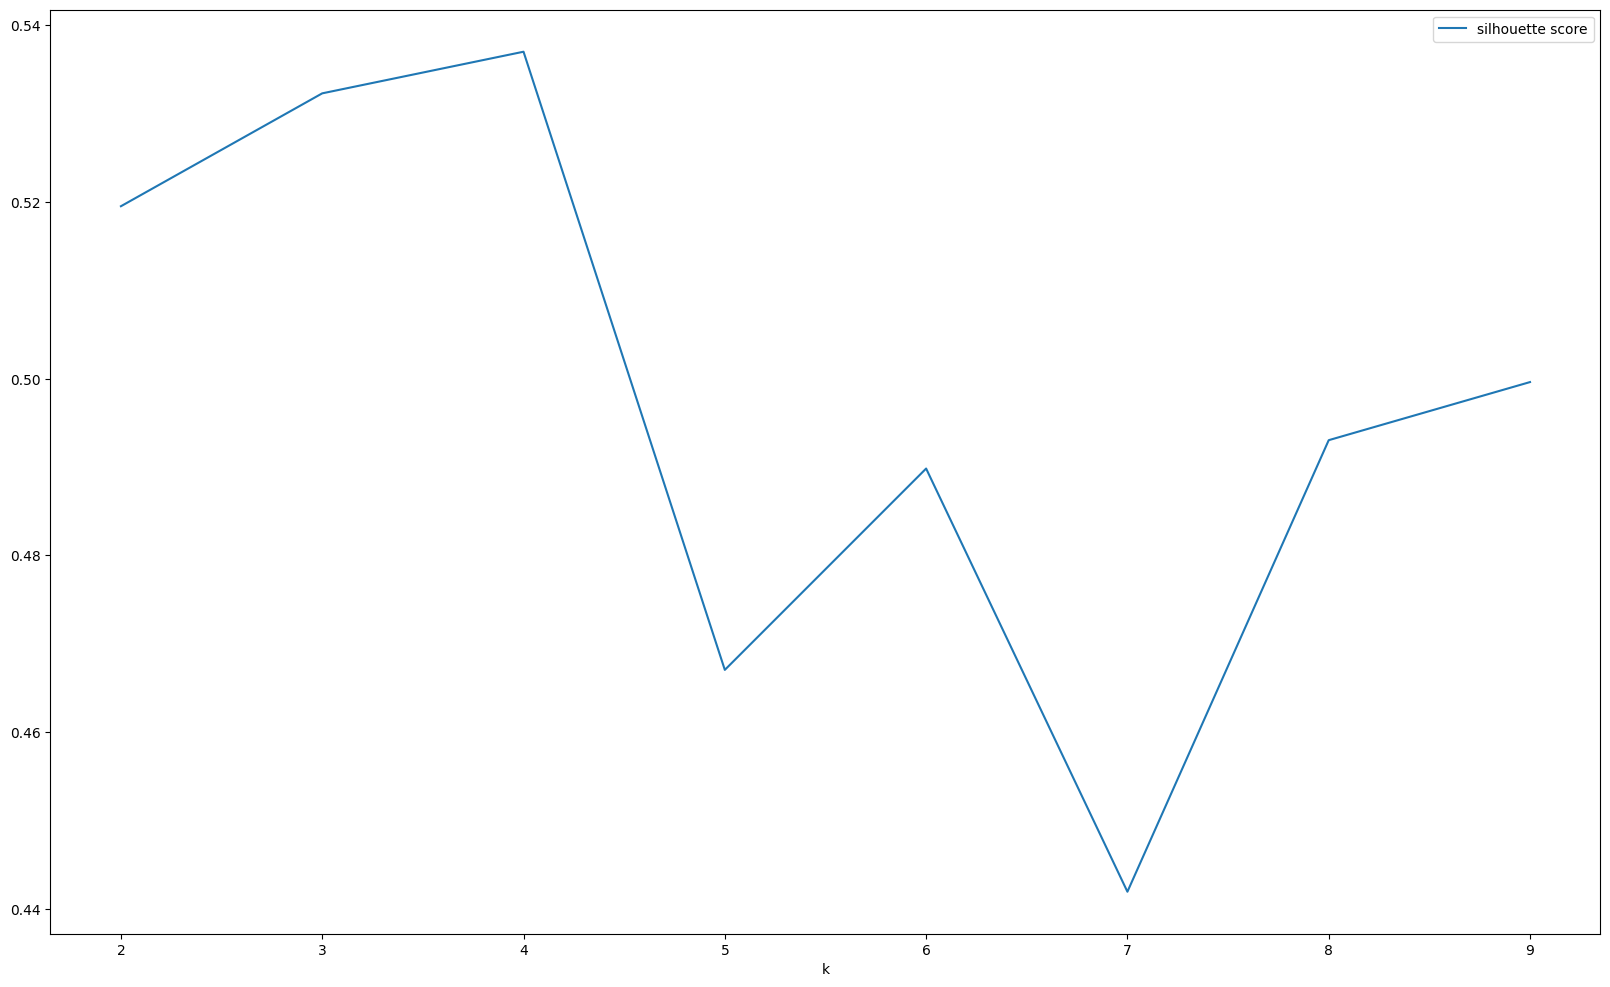

In [12]:
print(metrics.silhouette_score(df2,y_pred))
from sklearn.metrics.cluster import silhouette_score
k_values = []
silhouette_score_values = []

for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  y_pred = kmeans.fit_predict(df2)
  k_values.append(i)
  silhouette_score_values.append(metrics.silhouette_score(df2, y_pred))
result = pd.DataFrame({'k': k_values, 'silhouette score': silhouette_score_values})
result.plot.line(x='k', y = 'silhouette score', figsize=(20,12))

plt.show()

DBSCAN

In [13]:
db = DBSCAN(eps=25, min_samples=30).fit(df2)
y_pred_DB = db.fit_predict(df2)

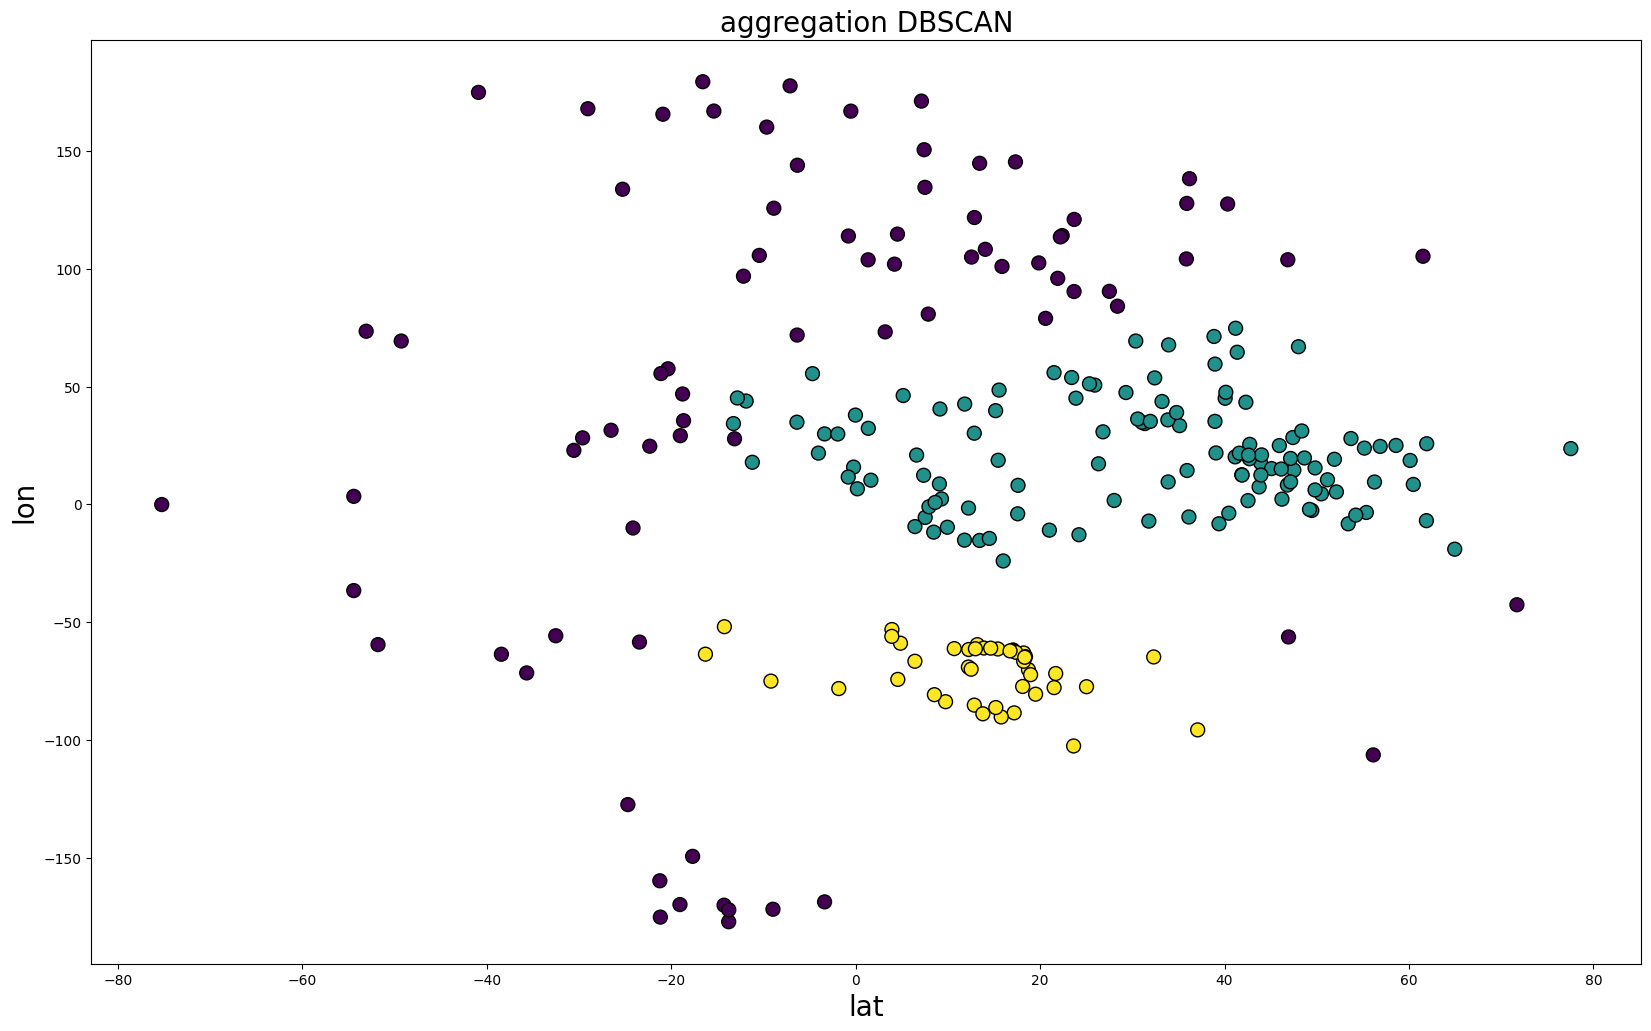

In [14]:
plt.figure(figsize=(20,12))
plt.scatter(
    lat, lon,
    c=y_pred_DB, marker='o',
    edgecolor='black', s=100
)
plt.xlabel("lat",fontsize=20)
plt.ylabel("lon",fontsize=20)
plt.title(file + " DBSCAN", fontsize=20)
plt.savefig("./images/DBSCAN_esp25_minSam30.png")
plt.show()

3. So sánh kết quả và nhận xét

- KMeans: cần biết trước số lượng cụm; tâm của cụm sẽ bị ảnh hưởng bởi các điểm khởi tạo tâm cụm đầu tiên. Khi xuất hiện outliers sẽ ảnh hưởng tới độ chính xác của thuật toán cũng như chất lượng của cụm.
- DBSCAN: ko cần biết trước số lượng cụm; cơ chế hình thành cụm đặc biệt mà ở đó các điểm dữ liệu nhiễu sẽ được tách thành một phần riêng 